DEEP LEARNING

LAB-6

PRANSHU PARATE

202211063

MNIST-fashion dataset

In [ ]:
#import the packages
import numpy as np
import matplotlib.pyplot as plt

**Build CNN model and apply classification on MNIST-fashion dataset**

In [ ]:
#load the dataset
from tensorflow.keras.datasets.fashion_mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
indexes = np.arange(X_test.shape[0])
for _ in range(5): indexes = np.random.permutation(indexes)
X_test = X_test[indexes]
y_test = y_test[indexes]

In [ ]:
val_count = 8000
X_val = X_test[:val_count]
y_val = y_test[:val_count]
X_test = X_test[val_count:]
y_test = y_test[val_count:]

In [ ]:
test_images, test_labels = X_test.copy(), y_test.copy()

In [ ]:
# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [ ]:
#printing the shape of train and test dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (2000, 28, 28, 1) (2000,)


In [ ]:
#import the packages
!pip install helper_funcs
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import regularizers

import helper_funcs as kru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for helper_funcs: filename=helper_funcs-0.1.35-py3-none-any.whl size=6031 sha256=38af440bdb950f61bbfa112f3742ac886abbe6910aee8b62758e1410ecc7bf0a
  Stored in directory: /root/.cache/pip/wheels/e6/55/2b/398a94dd25d0189f31557e481643a9c766ef37dd8fc867e66b
Successfully built helper_funcs


In [ ]:
#Define the parameters
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 28, 28, 1, 10

In [ ]:
#Building the model
model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(NUM_CLASSES, activation='softmax')
    ])

In [ ]:
#Compile the model
adam = Adam(lr=0.00001, decay=1e-6)
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                        

In [ ]:
#Fitting the model
history = model.fit(X_train, y_train, epochs=15,batch_size=16, validation_data=(X_val, y_val))

Epoch 1/15
3750/3750 [==============================] - 31s 7ms/step - loss: 0.5350 - accuracy: 0.8152 - val_loss: 0.3660 - val_accuracy: 0.8683
Epoch 2/15
3750/3750 [==============================] - 28s 7ms/step - loss: 0.3106 - accuracy: 0.8890 - val_loss: 0.3214 - val_accuracy: 0.8821
Epoch 3/15
3750/3750 [==============================] - 24s 6ms/step - loss: 0.2461 - accuracy: 0.9125 - val_loss: 0.3082 - val_accuracy: 0.8885
Epoch 4/15
3750/3750 [==============================] - 24s 6ms/step - loss: 0.1991 - accuracy: 0.9292 - val_loss: 0.2910 - val_accuracy: 0.8953
Epoch 5/15
3750/3750 [==============================] - 24s 7ms/step - loss: 0.1590 - accuracy: 0.9445 - val_loss: 0.2981 - val_accuracy: 0.8961
Epoch 6/15
3750/3750 [==============================] - 23s 6ms/step - loss: 0.1250 - accuracy: 0.9571 - val_loss: 0.3165 - val_accuracy: 0.8953
Epoch 7/15
3750/3750 [==============================] - 24s 6ms/step - loss: 0.0984 - accuracy: 0.9671 - val_loss: 0.3203 - val_ac

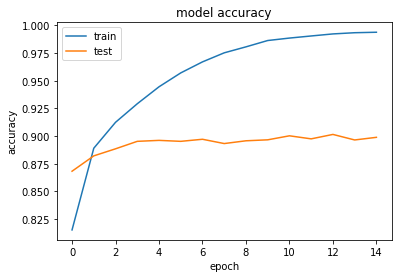

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

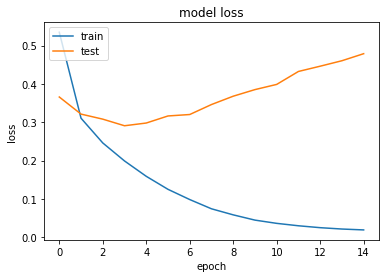

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Perform experiment while on any color image dataset - convert images to grayscale and train CNN on those images and compare its performance with CNN trained on original color images**

CIFAR10 DATASET

In [ ]:
#import the packages
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

In [ ]:
#load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
#Define the parameters
# batch_size = 128
num_classes = 10
# epochs = 15
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# input image dimensions
img_rows, img_cols = 32, 32




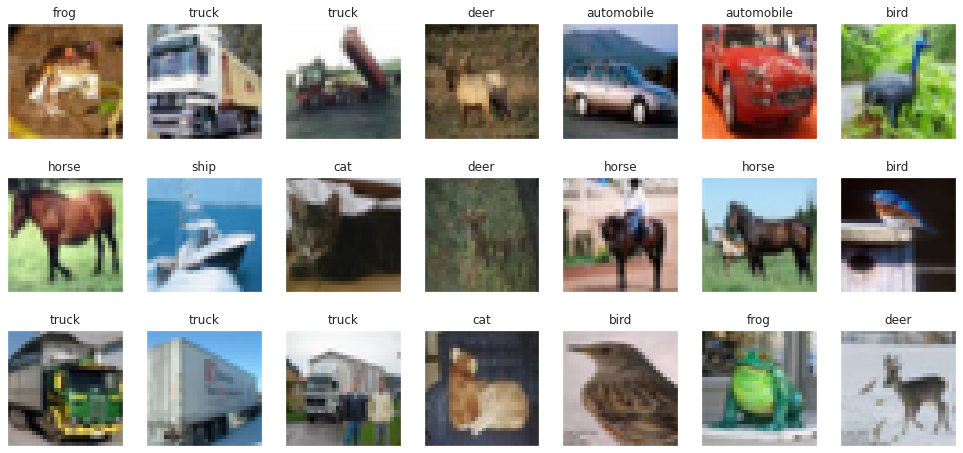

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(class_names[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
#convert RGB images into gray scale images
X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

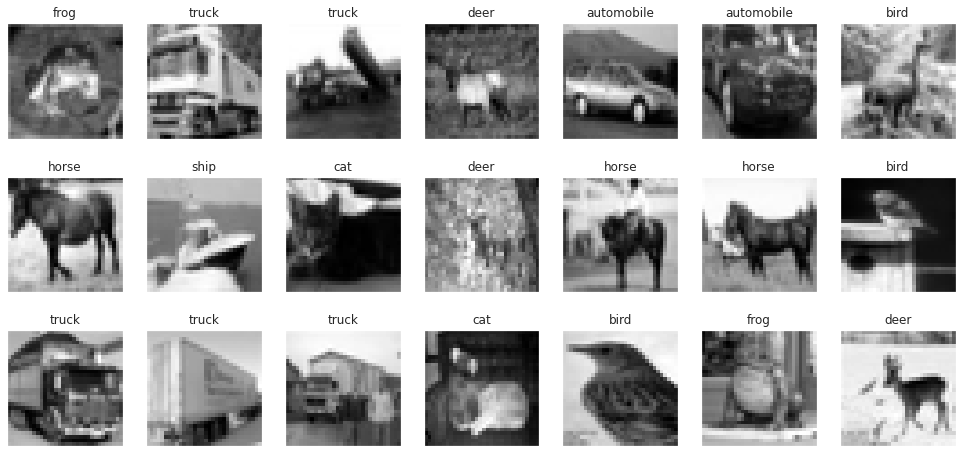

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(class_names[y_train[index][0]])
        axes[i,j].imshow(X_train_gray[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
print('X_train_gray shape:', X_train_gray.shape)
print(X_train_gray.shape[0], 'train samples')
print(X_test_gray.shape[0], 'test samples')

# If images are grayscale add fourth dimension to it
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], X_train_gray.shape[1], X_train_gray.shape[2], 1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], X_test_gray.shape[1], X_test_gray.shape[2], 1)

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

X_train_gray shape: (50000, 32, 32)
50000 train samples
10000 test samples


In [ ]:
#Normalize the data
X_train_gray=X_train_gray/255.0
X_test_gray=X_test_gray/255.0

In [ ]:
input_shape = (X_train_gray.shape[1], X_train_gray.shape[2], 1)

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 16)        9232      
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        4640      
                                                      

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])



In [ ]:
#Fitting the model
import time
start = time.time()
history = model.fit(X_train_gray, y_train, epochs=20, batch_size=32)
print("Total time: ", time.time() - start, "seconds")

Epoch 1/20
1563/1563 [==============================] - 17s 8ms/step - loss: 1.8275 - acc: 0.3190
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4042 - acc: 0.4936
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2129 - acc: 0.5716
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0890 - acc: 0.6184
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0034 - acc: 0.6495
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9330 - acc: 0.6749
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8735 - acc: 0.6959
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8233 - acc: 0.7121
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7723 - acc: 0.7285
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7383 - acc: 0.7428
Epoch 11/20
1563/1

In [ ]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_gray, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9698 - acc: 0.7004


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7003999948501587


In [ ]:
#Normalize tha data
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=[32,32,3]))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 16)        9232      
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 32)        4640      
                                                      

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

#Fitting the model
import time
start = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
print("Total time: ", time.time() - start, "seconds")

Epoch 1/20
1563/1563 [==============================] - 15s 7ms/step - loss: 1.7012 - acc: 0.3563
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2572 - acc: 0.5422
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0776 - acc: 0.6153
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9663 - acc: 0.6606
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8849 - acc: 0.6895
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8207 - acc: 0.7158
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7688 - acc: 0.7338
Epoch 8/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7261 - acc: 0.7477
Epoch 9/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6883 - acc: 0.7628
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6533 - acc: 0.7741
Epoch 11/20
1563/15

In [ ]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8029 - acc: 0.7429


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.742900013923645


The main difference between training a CNN on RGB and grayscale images is the complexity of the features extracted and the computational resources required.

Accuracy on above dataset for grayscale images is 70% while on rgb images it is 74%.

The grayscale images may have lower information content than the original color images, so the grayscale CNN may perform worse than the color CNN.

Time take to train graysacle image is less than rgb images.

Since RGB images have more information than grayscale images, the CNN trained on RGB images may be able to extract more complex and detailed features, which can lead to better performance. On the other hand, grayscale images have the advantage of being simpler, which can reduce the risk of overfitting and improve generalization.

